# [COM4513-6513] Assignment 1: Text Classification with Logistic Regression

### Instructor: Nikos Aletras


The goal of this assignment is to develop and test two text classification systems: 

- **Task 1:** sentiment analysis, in particular to predict the sentiment of movie review, i.e. positive or negative (binary classification).
- **Task 2:** topic classification, to predict whether a news article is about International issues, Sports or Business (multiclass classification).


For that purpose, you will implement:

- Text processing methods for extracting Bag-Of-Word features, using (1) unigrams, bigrams and trigrams to obtain vector representations of documents. Two vector weighting schemes should be tested: (1) raw frequencies (**3 marks; 1 for each ngram type**); (2) tf.idf (**1 marks**). 
- Binary Logistic Regression classifiers that will be able to accurately classify movie reviews trained with (1) BOW-count (raw frequencies); and (2) BOW-tfidf (tf.idf weighted) for Task 1. 
- Multiclass Logistic Regression classifiers that will be able to accurately classify news articles trained with (1) BOW-count (raw frequencies); and (2) BOW-tfidf (tf.idf weighted) for Task 2. 
- The Stochastic Gradient Descent (SGD) algorithm to estimate the parameters of your Logistic Regression models. Your SGD algorithm should:
    - Minimise the Binary Cross-entropy loss function for Task 1 (**3 marks**)
    - Minimise the Categorical Cross-entropy loss function for Task 2 (**3 marks**)
    - Use L2 regularisation (both tasks) (**1 mark**)
    - Perform multiple passes (epochs) over the training data (**1 mark**)
    - Randomise the order of training data after each pass (**1 mark**)
    - Stop training if the difference between the current and previous validation loss is smaller than a threshold (**1 mark**)
    - After each epoch print the training and development loss (**1 mark**)
- Discuss how did you choose hyperparameters (e.g. learning rate and regularisation strength)?  (**2 marks; 0.5 for each model in each task**).
- After training the LR models, plot the learning process (i.e. training and validation loss in each epoch) using a line plot (**1 mark; 0.5 for both BOW-count and BOW-tfidf LR models in each task**) and discuss if your model overfits/underfits/is about right.
- Model interpretability by showing the most important features for each class (i.e. most positive/negative weights). Give the top 10 for each class and comment on whether they make sense (if they don't you might have a bug!).  If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain? (**2 marks; 0.5 for BOW-count and BOW-tfidf LR models respectively in each task**)


### Data - Task 1 

The data you will use for Task 1 are taken from here: [http://www.cs.cornell.edu/people/pabo/movie-review-data/](http://www.cs.cornell.edu/people/pabo/movie-review-data/) and you can find it in the `./data_sentiment` folder in CSV format:

- `data_sentiment/train.csv`: contains 1,400 reviews, 700 positive (label: 1) and 700 negative (label: 0) to be used for training.
- `data_sentiment/dev.csv`: contains 200 reviews, 100 positive and 100 negative to be used for hyperparameter selection and monitoring the training process.
- `data_sentiment/test.csv`: contains 400 reviews, 200 positive and 200 negative to be used for testing.

### Data - Task 2

The data you will use for Task 2 is a subset of the [AG News Corpus](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) and you can find it in the `./data_topic` folder in CSV format:

- `data_topic/train.csv`: contains 2,400 news articles, 800 for each class to be used for training.
- `data_topic/dev.csv`: contains 150 news articles, 50 for each class to be used for hyperparameter selection and monitoring the training process.
- `data_topic/test.csv`: contains 900 news articles, 300 for each class to be used for testing.


### Submission Instructions

You should submit a Jupyter Notebook file (assignment1.ipynb) and an exported PDF version (you can do it from Jupyter: `File->Download as->PDF via Latex`).

You are advised to follow the code structure given in this notebook by completing all given funtions. You can also write any auxilliary/helper functions (and arguments for the functions) that you might need but note that you can provide a full solution without any such functions. Similarly, you can just use only the packages imported below but you are free to use any functionality from the [Python Standard Library](https://docs.python.org/2/library/index.html), NumPy, SciPy and Pandas. You are not allowed to use any third-party library such as Scikit-learn (apart from metric functions already provided), NLTK, Spacy, Keras etc..

Please make sure to comment your code. You should also mention if you've used Windows (not recommended) to write and test your code. There is no single correct answer on what your accuracy should be, but correct implementations usually achieve F1-scores around 80\% or higher. The quality of the analysis of the results is as important as the accuracy itself. 

This assignment will be marked out of 20. It is worth 20\% of your final grade in the module.

The deadline for this assignment is **23:59 on Fri, 20 Mar 2020** and it needs to be submitted via MOLE. Standard departmental penalties for lateness will be applied. We use a range of strategies to detect [unfair means](https://www.sheffield.ac.uk/ssid/unfair-means/index), including Turnitin which helps detect plagiarism, so make sure you do not plagiarise.



In [1919]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# fixing random seed for reproducibility
random.seed(123)
np.random.seed(123)


## Load Raw texts and labels into arrays

First, you need to load the training, development and test sets from their corresponding CSV files (tip: you can use Pandas dataframes).

In [1920]:
# fill in your code...
data_tr = pd.read_csv('./data_sentiment/train.csv',header=None,names=['text','label'])
data_te = pd.read_csv('./data_sentiment/test.csv',header=None,names=['text','label'])
data_de = pd.read_csv('./data_sentiment/dev.csv',header=None,names=['text','label'])

If you use Pandas you can see a sample of the data.

In [1921]:
data_tr.head()
#data_te.head()
#data_de.head()

,text,label
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1


The next step is to put the raw texts into Python lists and their corresponding labels into NumPy arrays:


In [1922]:
# fill in your code...
#train data transformation
X_tr_raw = data_tr['text'].tolist()
Y_tr = np.array(data_tr['label'])
#test data transformatino
X_te_raw = data_te['text'].tolist()
Y_te = np.array(data_te['label'])
#development data transformatino
X_de_raw = data_de['text'].tolist()
Y_de = np.array(data_de['label'])

# Bag-of-Words Representation 


To train and test Logisitc Regression models, you first need to obtain vector representations for all documents given a vocabulary of features (unigrams, bigrams, trigrams).


## Text Pre-Processing Pipeline

To obtain a vocabulary of features, you should: 
- tokenise all texts into a list of unigrams (tip: using a regular expression) 
- remove stop words (using the one provided or one of your preference) 
- compute bigrams, trigrams given the remaining unigrams
- remove ngrams appearing in less than K documents
- use the remaining to create a vocabulary of unigrams, bigrams and trigrams (you can keep top N if you encounter memory issues).


In [1923]:
stop_words = ['a','in','on','at','and','or', 
              'to', 'the', 'of', 'an', 'by', 
              'as', 'is', 'was', 'were', 'been', 'be', 
              'are','for', 'this', 'that', 'these', 'those', 'you', 'i','if',
             'it', 'he', 'she', 'we', 'us','they', 'will', 'have', 'has',
              'do', 'did', 'can', 'could', 'who', 'which', 'what', 
             'his', 'her', 'they', 'them', 'their','from', 'with', 'its']


### N-gram extraction from a document

You first need to implement the `extract_ngrams` function. It takes as input:
- `x_raw`: a string corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `vocab`: a given vocabulary. It should be used to extract specific features.

and returns:

- a list of all extracted features.

See the examples below to see how this function should work.

In [1924]:
def extract_ngrams(x_raw, ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b', stop_words=[], vocab=set()):
    # fill in your code...
    unigram = []
    bigram = []
    trigram = []
    # get unigram by using regex
    pattern = re.compile(token_pattern)
    x_re = pattern.findall(x_raw.lower())
    # remove stop words
    for i in range(len(x_re)):
        if x_re[i] not in stop_words:
            unigram.append(x_re[i])
    # return bigram or trigram
    if ngram_range==(1,3):
        for i in range(len(unigram)-1):
            bigram.append((unigram[i],unigram[i+1]))
        for i in range(len(unigram)-2):
            trigram.append((unigram[i],unigram[i+1],unigram[i+2]))
        x = unigram + bigram + trigram
        
    if ngram_range==(1,2):
        for i in range(len(unigram)-1):
            bigram.append((unigram[i],unigram[i+1]))
        x = unigram + bigram
    if vocab:
        x = list(vocab)
    return x

In [1925]:
extract_ngrams("this is a great movie to watch ",
               ngram_range=(1,3),
               stop_words=stop_words)


['great',
 'movie',
 'watch',
 ('great', 'movie'),
 ('movie', 'watch'),
 ('great', 'movie', 'watch')]

In [1926]:
extract_ngrams("this is a great movie to watch", 
               ngram_range=(1,2), 
               stop_words=stop_words, 
               vocab=set(['great',  ('great','movie')]))

['great', ('great', 'movie')]

Note that it is OK to represent n-grams using lists instead of tuples: e.g. `['great', ['great', 'movie']]`

#### Create a vocabulary of n-grams

Then the `get_vocab` function will be used to (1) create a vocabulary of ngrams; (2) count the document frequencies of ngrams; (3) their raw frequency. It takes as input:
- `X_raw`: a list of strings each corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `min_df`: keep ngrams with a minimum document frequency.
- `keep_topN`: keep top-N more frequent ngrams.

and returns:

- `vocab`: a set of the n-grams that will be used as features.
- `df`: a Counter (or dict) that contains ngrams as keys and their corresponding document frequency as values.
- `ngram_counts`: counts of each ngram in vocab

Hint: it should make use of the `extract_ngrams` function.

In [1927]:
def get_vocab(X_raw, ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b', min_df=0, keep_topN=0, stop_words=[]):
    # fill in your code..
    ngrams = []
    ngrams_df = []
    for i in X_raw:
        n_grams = extract_ngrams(i,ngram_range=ngram_range,token_pattern=token_pattern,stop_words=stop_words)
        ngrams += n_grams
        ngrams_df += list(set(n_grams))
    more_frequent_ngrams = Counter(ngrams).most_common(keep_topN)
    #get more frequent ngrams key
    features = []
    ngram_counts = 0
    for k in more_frequent_ngrams:
        features.append(k[0])
        ngram_counts += k[1]
    vocab = set(features)
    #get document frequency for ngrams
    df = Counter(ngrams_df)
    # set min df for ngrams whose df is 0 
    for i in features:
        if i not in ngrams_df:
            df[i]=min_df
    return vocab, df, ngram_counts


Now you should use `get_vocab` to create your vocabulary and get document and raw frequencies of n-grams:

In [1928]:
vocab, df, ngram_counts = get_vocab(X_tr_raw, ngram_range=(1,3),keep_topN=5000,stop_words=stop_words)
print(len(vocab))
print()
print(list(vocab)[:100])
print()
print(df.most_common()[:10])

5000

['pre', ('some', 'scenes'), 'ann', 'struggles', 'empty', ('high', 'school'), 'number', 'barry', 'ace', 'threatening', 'henstridge', 'ignore', 'exploring', 'ensemble', 'motion', 'record', 'suffice', 'thrilling', 'walking', 'predictable', 'bunch', 'machines', ('but', 'only'), 'bloody', ('not', 'so'), 'natalie', 'surely', 'non', 'ability', 'impact', 'life', 'line', 'emotions', ('first', 'film'), 'duchovny', 'featuring', ('but', 'never'), 'matters', 'stolen', 'below', 'hard', 'round', 'wanting', 'albert', ('not', 'enough'), 'tense', 'darth', 'bruce', 'chicken', 'actress', 'oh', 'edward', ('but', 'so'), 'police', 'jewish', 'degree', 'floor', 'happen', ('so', 'bad'), 'peak', 'raimi', ('all', 'other'), 'warrior', ('dante', 'peak'), 'ideal', 'trio', 'guard', 'followed', 'predecessor', 'mainly', 'points', ('some', 'other'), 'headed', 'fishburne', 'looking', 'along', ('private', 'ryan'), 'upcoming', 'created', 'richards', ('mel', 'gibson'), 'together', 'lazy', 'murdered', ('while', 'not'),

Then, you need to create vocabulary id -> word and id -> word dictionaries for reference:

In [1929]:
# fill in your code...
id_word_dic = dict(enumerate(vocab))
word_id_dic = {v:k for k,v in id_word_dic.items()}

Now you should be able to extract n-grams for each text in the training, development and test sets:

In [1930]:
# get X_ngram
def get_X_ngram(X_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words):
    # create a list of docs,each doc is a list of ngrams
    N_grams = []
    for i in X_raw:
        n_grams = extract_ngrams(i,ngram_range=ngram_range,token_pattern=token_pattern,stop_words=stop_words)
        N_grams.append(n_grams) 
    # remove those ngrams which are not in vocab    
    X_ngram = []
    for texts in N_grams:
        for ngram in texts:
            if ngram not in vocab:
                texts.remove(ngram)
        X_ngram.append(texts)
    return X_ngram
X_tr_ngram = get_X_ngram(X_tr_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)
X_te_ngram = get_X_ngram(X_te_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)
X_de_ngram = get_X_ngram(X_de_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)

## Vectorise documents 

Next, write a function `vectoriser` to obtain Bag-of-ngram representations for a list of documents. The function should take as input:
- `X_ngram`: a list of texts (documents), where each text is represented as list of n-grams in the `vocab`
- `vocab`: a set of n-grams to be used for representing the documents

and return:
- `X_vec`: an array with dimensionality Nx|vocab| where N is the number of documents and |vocab| is the size of the vocabulary. Each element of the array should represent the frequency of a given n-gram in a document.


In [1931]:
def vectorise(X_ngram, vocab):
    # fill in your code...
    N = len(X_ngram)
    X_vec = np.zeros((N,len(vocab)))
    vocab_list = list(vocab)
    for i in range(N):
        for j in range(len(vocab)):
            #count word frequency in each doc 
            X_vec[i][j]=X_ngram[i].count(vocab_list[j])
    return X_vec


Finally, use `vectorise` to obtain document vectors for each document in the train, development and test set. You should extract both count and tf.idf vectors respectively:

In [1932]:
X_tr_count = vectorise(X_tr_ngram, vocab)
X_te_count = vectorise(X_te_ngram, vocab)
X_de_count = vectorise(X_de_ngram, vocab)

#### Count vectors

In [1933]:
X_tr_count.shape

(1400, 5000)

In [1934]:
X_tr_count[:2,:50]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

#### TF.IDF vectors

First compute `idfs` an array containing inverted document frequencies (Note: its elements should correspond to your `vocab`)

In [1935]:
# fill in your code...
def get_idf(X_raw,vocab,df):
    N = len(X_raw)
    idf = np.zeros((len(vocab)))
    vocab_list = list(vocab)
    for i in range(len(vocab)):
        ngram = vocab_list[i]
        idf[i] = np.log10(N/df[ngram])
    return idf
idfs = get_idf(X_tr_raw,vocab,df)

Then transform your count vectors to tf.idf vectors:

In [1936]:
X_tr_tfidf = X_tr_count*idfs
X_te_tfidf = X_te_count*idfs
X_de_tfidf = X_de_count*idfs

In [1937]:
X_tr_tfidf[1,:50]

array([0.        , 1.66900678, 0.        , 0.        , 0.        ,
       0.        , 1.03553833, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.28280518,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38120505, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.43012469, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

# Binary Logistic Regression

After obtaining vector representations of the data, now you are ready to implement Binary Logistic Regression for classifying sentiment.

First, you need to implement the `sigmoid` function. It takes as input:

- `z`: a real number or an array of real numbers 

and returns:

- `sig`: the sigmoid of `z`

In [1938]:

def sigmoid(z):
    
    # fill in your code...
    sig = 1/(1+np.exp(-z))
    
    return sig

In [1939]:
print(sigmoid(0)) 
print(sigmoid(np.array([-5., 1.2])))

0.5
[0.00669285 0.76852478]


Then, implement the `predict_proba` function to obtain prediction probabilities. It takes as input:

- `X`: an array of inputs, i.e. documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

and returns:

- `preds_proba`: the prediction probabilities of X given the weights

In [1940]:
def predict_proba(X, weights):
    # fill in your code...
    preds_proba = sigmoid(np.dot(weights,X.T))
    return preds_proba


Then, implement the `predict_class` function to obtain the most probable class for each vector in an array of input vectors. It takes as input:

- `X`: an array of documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

and returns:

- `preds_class`: the predicted class for each x in X given the weights

In [1941]:
def predict_class(X, weights):
    # fill in your code...
    preds_proba = predict_proba(X, weights)
    N = preds_proba.shape[0]
    preds_class = np.zeros((N,)).astype(int)
    for i in range(len(preds_proba)):
        if preds_proba[i]<0.5:
            preds_class[i] = 0
        else:
            preds_class[i] = 1
    return preds_class

To learn the weights from data, we need to minimise the binary cross-entropy loss. Implement `binary_loss` that takes as input:

- `X`: input vectors
- `Y`: labels
- `weights`: model weights
- `alpha`: regularisation strength

and return:

- `l`: the loss score

In [1942]:
def binary_loss(X, Y, weights, alpha=0.00001):
    # fill in your code...
    preds_proba = predict_proba(X, weights)
    L = np.zeros((len(Y),))
    for i in range(len(Y)):
        # loss of each doc
        L[i] = -1*Y[i]*np.log(preds_proba[i])-(1-Y[i])*np.log(1-preds_proba[i])
        # regularisation part 
        regular = alpha*np.square(np.sum(np.power(weights,2)))
        L[i] = L[i] + regular
    l = np.mean(L)
    return l
    


Now, you can implement Stochastic Gradient Descent to learn the weights of your sentiment classifier. The `SGD` function takes as input:

- `X_tr`: array of training data (vectors)
- `Y_tr`: labels of `X_tr`
- `X_dev`: array of development (i.e. validation) data (vectors)
- `Y_dev`: labels of `X_dev`
- `lr`: learning rate
- `alpha`: regularisation strength
- `epochs`: number of full passes over the training data
- `tolerance`: stop training if the difference between the current and previous validation loss is smaller than a threshold
- `print_progress`: flag for printing the training progress (train/validation loss)


and returns:

- `weights`: the weights learned
- `training_loss_history`: an array with the average losses of the whole training set after each epoch
- `validation_loss_history`: an array with the average losses of the whole development set after each epoch

In [1946]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], loss="binary", lr=0.1, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    
    cur_loss_tr = 1.
    cur_loss_dev = 1.
    training_loss_history = []
    validation_loss_history = []
    # initialize w with zeros
    m,n = X_tr.shape
    weights = np.zeros((n,))
    for i in range(epochs):
        # randomise order in training Data
        permutation = np.random.permutation(m)
        shuffled_x = X_tr[permutation,:]
        shuffled_y = Y_tr[permutation]
        for j in range(len(shuffled_y)):
            # prediction value
            h = predict_proba(shuffled_x[j],weights)
            # compute the error
            error = h - shuffled_y[j]
            # update weights and use L2 regularisation
            weights = weights - lr*((shuffled_x[j]*error)+2*alpha*weights)
        pre_loss_tr = cur_loss_tr
        pre_loss_dev = cur_loss_dev
        cur_loss_tr = binary_loss(shuffled_x,shuffled_y,weights,alpha)
        cur_loss_dev = binary_loss(X_dev,Y_dev,weights,alpha)
        training_loss_history.append(cur_loss_tr)
        validation_loss_history.append(cur_loss_dev)
        if print_progress==True:
            print("Epoch: ",i,"| Training loss: ",cur_loss_tr,"| Validation loss: ",cur_loss_dev)
        if (pre_loss_dev - cur_loss_dev) < tolerance:
            break
            

    return weights, training_loss_history, validation_loss_history




## Train and Evaluate Logistic Regression with Count vectors

First train the model using SGD:

In [1947]:
w_count, loss_tr_count, dev_loss_count = SGD(X_tr_count, Y_tr, 
                                             X_dev=X_de_count, 
                                             Y_dev=Y_de, 
                                             lr=0.0001, 
                                             alpha=0.001, 
                                             epochs=100
                                             )

Epoch:  0 | Training loss:  0.6287448383180287 | Validation loss:  0.6460804805745204
Epoch:  1 | Training loss:  0.5847009748726169 | Validation loss:  0.6155549977825893
Epoch:  2 | Training loss:  0.5514903395604694 | Validation loss:  0.593369204588327
Epoch:  3 | Training loss:  0.5235667821132639 | Validation loss:  0.5734761277101876
Epoch:  4 | Training loss:  0.5019700388425717 | Validation loss:  0.5578722999651631
Epoch:  5 | Training loss:  0.48168011997147864 | Validation loss:  0.5453146365860989
Epoch:  6 | Training loss:  0.4654191896964703 | Validation loss:  0.537264611135136
Epoch:  7 | Training loss:  0.4494563060260835 | Validation loss:  0.5252515891478492
Epoch:  8 | Training loss:  0.4360583053465348 | Validation loss:  0.5179887824260425
Epoch:  9 | Training loss:  0.4248582315006029 | Validation loss:  0.5098375242346687
Epoch:  10 | Training loss:  0.41260975974958713 | Validation loss:  0.5030286197437708
Epoch:  11 | Training loss:  0.4023022299223317 | Val

Now plot the training and validation history per epoch. Does your model underfit, overfit or is it about right? Explain why.


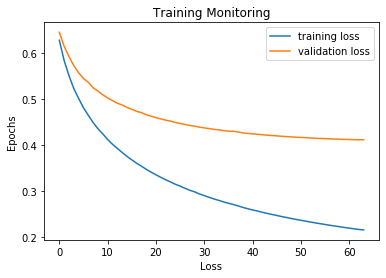

In [1948]:
epochs = []
for i in range(len(loss_tr_count)):
    epochs.append(i)
plt.plot(epochs, loss_tr_count,label='training loss')
plt.plot(epochs, dev_loss_count,label='validation loss')
plt.legend()
plt.title('Training Monitoring')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

Explain here...

The model is about right. Because both of the training loss and validation loss are declining and when train processes stop they are close to be convergent.

Compute accuracy, precision, recall and F1-scores:

In [1949]:
# fill in your code...
preds_te_count = predict_class(X_te_count, w_count)
print('Accuracy:', accuracy_score(Y_te,preds_te_count))
print('Precision:', precision_score(Y_te,preds_te_count))
print('Recall:', recall_score(Y_te,preds_te_count))
print('F1-Score:', f1_score(Y_te,preds_te_count))

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1-Score: 0.8399999999999999


Finally, print the top-10 words for the negative and positive class respectively.

In [1950]:
# fill in your code..
# top10 negative words
vocab_list = list(vocab)
neg_w = sorted(w_count)
print("top-10 words for negative class:")
for i in range(10):
    index = np.where(w_count == neg_w[i])[0][0]
    print(vocab_list[index])
    

top-10 words for negative class:
bad
only
unfortunately
worst
plot
script
why
boring
any
nothing


In [1951]:
# fill in your code...
# top10 positive words
pos_w = sorted(w_count,reverse = True)
print("top-10 words for positive class:")
for i in range(10):
    index = np.where(w_count == pos_w[i])[0][0]
    print(vocab_list[index])

top-10 words for positive class:
great
well
also
seen
life
fun
many
world
both
movies


If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

Provide your answer here...

These features would not generalise commodity reviews perfectly because they include some noun words(movies,world,script,life). These features cannot show wheather reviews are positive or negative. Only those adjective features like emotional words(bad, worst boring great fun...) that are used to evaluate commodity could be picked up.

## Train and Evaluate Logistic Regression with TF.IDF vectors

Follow the same steps as above (i.e. evaluating count n-gram representations).


In [1952]:
w_tfidf, trl, devl = SGD(X_tr_tfidf, Y_tr, 
                         X_dev=X_de_tfidf, 
                         Y_dev=Y_de, 
                         lr=0.0001, 
                         alpha=0.00001,
                         epochs=50)

Epoch:  0 | Training loss:  0.6387394645509009 | Validation loss:  0.6646193340071946
Epoch:  1 | Training loss:  0.5968689754636599 | Validation loss:  0.6429415956760386
Epoch:  2 | Training loss:  0.5623396165166045 | Validation loss:  0.6251052956422272
Epoch:  3 | Training loss:  0.5331379897978898 | Validation loss:  0.6097801594524369
Epoch:  4 | Training loss:  0.5080009553911554 | Validation loss:  0.5967061958522705
Epoch:  5 | Training loss:  0.48598397188207254 | Validation loss:  0.5852016523207958
Epoch:  6 | Training loss:  0.4664557163211444 | Validation loss:  0.5750434455815823
Epoch:  7 | Training loss:  0.4490006784861553 | Validation loss:  0.5659601624233466
Epoch:  8 | Training loss:  0.4332453248112313 | Validation loss:  0.5578201901696366
Epoch:  9 | Training loss:  0.41891181526807875 | Validation loss:  0.5504702286063256
Epoch:  10 | Training loss:  0.40578933346393653 | Validation loss:  0.5437661232597261
Epoch:  11 | Training loss:  0.39363428069185424 |

Now plot the training and validation history per epoch. Does your model underfit, overfit or is it about right? Explain why.

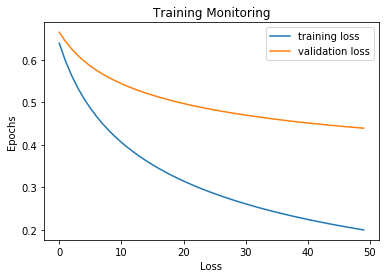

In [1953]:
# fill in your code...

epochs = []
for i in range(len(trl)):
    epochs.append(i)

plt.plot(epochs, trl, label='training loss')
plt.plot(epochs, devl, label='validation loss')
plt.legend()
plt.title('Training Monitoring')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

The model is about right. The validation loss is declining and convergent at the end of the training process, but it seems that training loss is not quite convergent and it still can be declining.

Compute accuracy, precision, recall and F1-scores:

In [1954]:
# fill in your code...
preds_te = predict_class(X_te_tfidf, w_tfidf)
print('Accuracy:', accuracy_score(Y_te,preds_te))
print('Precision:', precision_score(Y_te,preds_te))
print('Recall:', recall_score(Y_te,preds_te))
print('F1-Score:', f1_score(Y_te,preds_te))

Accuracy: 0.855
Precision: 0.8480392156862745
Recall: 0.865
F1-Score: 0.8564356435643564


Print top-10 most positive and negative words:

In [1955]:
# fill in your code...
neg_w_tfidf = sorted(w_tfidf)
print("top-10 words for negative class:")
for i in range(10):
    index = np.where(w_tfidf == neg_w_tfidf[i])[0][0]
    print(vocab_list[index])

top-10 words for negative class:
bad
worst
boring
supposed
why
unfortunately
stupid
harry
ridiculous
nothing


In [1956]:
# fill in your code...
pos_w_tfidf = sorted(w_tfidf,reverse = True)
print("top-10 words for positive class:")
for i in range(10):
    index = np.where(w_tfidf == pos_w_tfidf[i])[0][0]
    print(vocab_list[index])

top-10 words for positive class:
great
truman
life
perfectly
hilarious
terrific
perfect
excellent
memorable
world


The model perform better after using tf-idf vectors. More adjective words are generated in the results. The words like unfortunately, ridiculous, stupid, ridiculous, perfectly, hilarious... could be picked up in different domains.

### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

Enter your answer here...

I attempt to choose learning rate by multiple 0.1. If the loss is increasing, I will adjust the learning rate by choosing a smaller number. If the loss is gradually decreasing and can be convergence, that would be the best choice for learing rate. After choosing the learning rate, then according to the validation loss increasing or decreasing the regularistion strength 10 times of 0.1. The optimal hyperparameters would give a high precision and recall rate model. The smaller the learning rate, the more training epochs. The regularisation strength can prevent model overfitting, to make sure the model has both good performance on both training set and test set.



## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  |
|:-:|:-:|:-:|:-:|
| BOW-count  |  0.84 | 0.84  | 0.83  |
| BOW-tfidf  | 0.84  | 0.86  |  0.85 |


# Multi-class Logistic Regression 

Now you need to train a Multiclass Logistic Regression (MLR) Classifier by extending the Binary model you developed above. You will use the MLR model to perform topic classification on the AG news dataset consisting of three classes:

- Class 1: World
- Class 2: Sports
- Class 3: Business

You need to follow the same process as in Task 1 for data processing and feature extraction by reusing the functions you wrote.

In [1957]:
# fill in your code...
data_tr = pd.read_csv('./data_topic/train.csv',header=None,names=['label','text'])
data_te = pd.read_csv('./data_topic/test.csv',header=None,names=['label','text'])
data_de = pd.read_csv('./data_topic/dev.csv',header=None,names=['label','text'])

In [1958]:
data_tr.head()

,label,text
0,1,Reuters - Venezuelans turned out early\and in ...
1,1,Reuters - South Korean police used water canno...
2,1,Reuters - Thousands of Palestinian\prisoners i...
3,1,AFP - Sporadic gunfire and shelling took place...
4,1,AP - Dozens of Rwandan soldiers flew into Suda...


In [1959]:
# fill in your code...
#train data transformation
X_tr_raw = data_tr['text'].tolist()
Y_tr = np.array(data_tr['label'])
#test data transformatino
X_te_raw = data_te['text'].tolist()
Y_te = np.array(data_te['label'])
#development data transformation
X_de_raw = data_de['text'].tolist()
Y_de = np.array(data_de['label'])

In [1960]:
vocab, df, ngram_counts = get_vocab(X_tr_raw, ngram_range=(1,3), keep_topN=5000, stop_words=stop_words)
print(len(vocab))
print()
print(list(vocab)[:100])
print()
print(df.most_common()[:10])

5000

['berlusconi', 'pre', 'empty', 'number', 'barry', 'basketball', 'threatening', ('internet', 'ipo'), 'dug', 'thumb', 'record', ('agency', 'said'), 'eastern', ('nfl', 'players', 'association'), ('beijing', 'reuters', 'china'), ('higher', 'wednesday'), ('two', 'most', 'spectacular'), 'keller', 'bloody', ('lowe', 'cos', 'lt'), 'non', 'impact', ('general', 'motors'), 'life', 'tumbled', 'line', 'ohalete', 'below', 'hard', 'round', 'calif', ('street', 'estimates'), 'sprinters', ('months', 'industry', 'group'), ('iraq', 'national', 'conference'), ('strength', 'agricultural'), ('ninth', 'inning'), ('fullquote', 'gt'), ('public', 'offering', 'registration'), ('baltimore', 'orioles'), ('home', 'improvement'), ('man', 'among', 'sick'), ('election', 'year'), 'police', 'jewish', 'knee', 'happen', 'venus', ('public', 'offering'), ('offering', 'nearly'), 'bush', ('go', 'ahead'), ('agreed', 'disarm'), ('final', 'phelps'), 'burundi', 'guard', 'hostile', 'points', 'programs', 'headed', ('farm', 'eq

In [1961]:
# fill in your code...
X_tr_ngram = get_X_ngram(X_tr_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)
X_te_ngram = get_X_ngram(X_te_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)
X_de_ngram = get_X_ngram(X_de_raw,vocab,ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b',stop_words=stop_words)

In [1962]:
X_tr_count = vectorise(X_tr_ngram, vocab)
X_te_count = vectorise(X_te_ngram, vocab)
X_de_count = vectorise(X_de_ngram, vocab)

In [1963]:
idfs = get_idf(X_tr_raw,vocab,df)
X_tr_tfidf = X_tr_count*idfs
X_te_tfidf = X_te_count*idfs
X_de_tfidf = X_de_count*idfs

Now you need to change `SGD` to support multiclass datasets. First you need to develop a `softmax` function. It takes as input:

- `z`: array of real numbers 

and returns:

- `smax`: the softmax of `z`

In [1964]:
def softmax(z):
    t = np.exp(z)
    smax = np.exp(z) / np.sum(t, axis=1).reshape(-1,1)
    return smax
 

Then modify `predict_proba` and `predict_class` functions for the multiclass case:

In [1965]:
def predict_proba(X, weights):
    
    # fill in your code...
    preds_proba = softmax(np.dot(X,weights.T))
    return preds_proba

In [1966]:
def predict_class(X, weights):
    
    # fill in your code...
    n = X.shape[0]
    preds_class = np.zeros((n,)).astype(int)
    preds_proba = predict_proba(X, weights)
    for i in range(len(preds_proba)):
        # find the correct class
        pred_class = np.where(preds_proba[i]==np.max(preds_proba[i]))[0][0] + 1
        preds_class[i] = pred_class
        
    return preds_class

Toy example and expected functionality of the functions above:

In [1967]:
X = np.array([[0.1,0.2],[0.2,0.1],[0.1,-0.2]])
w = np.array([[2,-5],[-5,2]])

In [1968]:
predict_proba(X, w)

array([[0.33181223, 0.66818777],
       [0.66818777, 0.33181223],
       [0.89090318, 0.10909682]])

In [1969]:
predict_class(X, w)

array([2, 1, 1])

Now you need to compute the categorical cross entropy loss (extending the binary loss to support multiple classes).

In [1970]:
def categorical_loss(X, Y, weights, num_classes=5, alpha=0.00001):
    preds_proba = predict_proba(X, weights)
    L = np.zeros((num_classes,len(Y)))
    for i in range(len(Y)):
        index = Y[i] - 1
        #compute loss of correct class
        L[index][i] = (-Y[i])*np.log(preds_proba[i][index])
        #regularisation part 
        regular = alpha*np.square(np.sum(np.power(weights[index],2)))
        L[index][i] = L[index][i] + regular
    l = np.mean(L)
        
    return l
    
    

Finally you need to modify SGD to support the categorical cross entropy loss:

In [1971]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], num_classes=5, lr=0.01, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    
    # fill in your code...
    cur_loss_tr = 2.
    cur_loss_dev = 2.
    training_loss_history = []
    validation_loss_history = []
    m,n = X_tr.shape
    # initialize w with zeros
    weights = np.zeros((num_classes,n))
    for i in range(epochs):
        # randomise order in training Data
        permutation = np.random.permutation(m)
        shuffled_x = X_tr[permutation,:]
        shuffled_y = Y_tr[permutation]
        for j in range(len(Y_tr)):
            #find correct index
            index = shuffled_y[j] - 1
            #compute predcition value
            pred = predict_proba(shuffled_x[j].reshape(1,-1),weights)
            #update weights of correct class
            weights[index] = weights[index] - lr*(shuffled_x[j]*(pred[0][index]-1)+2*alpha*weights[index])
        pre_loss_tr = cur_loss_tr
        pre_loss_dev = cur_loss_dev
        cur_loss_tr = categorical_loss(shuffled_x,shuffled_y,weights,num_classes,alpha)
        cur_loss_dev = categorical_loss(X_dev,Y_dev,weights,num_classes,alpha)
        training_loss_history.append(cur_loss_tr)
        validation_loss_history.append(cur_loss_dev)
        if print_progress==True:
            print("Epoch: ",i,"| Training loss: ",cur_loss_tr,"| Validation loss: ",cur_loss_dev)
        if (pre_loss_dev - cur_loss_dev) < tolerance:
            break

    return weights, training_loss_history, validation_loss_history



Now you are ready to train and evaluate you MLR following the same steps as in Task 1 for both Count and tfidf features:

In [1972]:
w_count, loss_tr_count, dev_loss_count = SGD(X_tr_count, Y_tr, 
                                             X_dev=X_de_count,
                                             Y_dev=Y_de, 
                                             num_classes=3,
                                             lr=0.0001,
                                             alpha=0.001, 
                                             epochs=200) 

Epoch:  0 | Training loss:  0.7154662929931689 | Validation loss:  0.7245454264341528
Epoch:  1 | Training loss:  0.7000640189159985 | Validation loss:  0.7171704652129751
Epoch:  2 | Training loss:  0.6860314104375709 | Validation loss:  0.7102427173971237
Epoch:  3 | Training loss:  0.673161153042827 | Validation loss:  0.703704383326883
Epoch:  4 | Training loss:  0.6612669979319432 | Validation loss:  0.6975054887449498
Epoch:  5 | Training loss:  0.6502128248971629 | Validation loss:  0.691608504671137
Epoch:  6 | Training loss:  0.6398596396871865 | Validation loss:  0.6859690335873189
Epoch:  7 | Training loss:  0.6301377824698938 | Validation loss:  0.6805697882290901
Epoch:  8 | Training loss:  0.6209535214729662 | Validation loss:  0.6753794702694033
Epoch:  9 | Training loss:  0.6122527733751929 | Validation loss:  0.6703808879434647
Epoch:  10 | Training loss:  0.6039784813635876 | Validation loss:  0.6655557729039074
Epoch:  11 | Training loss:  0.5960959089628614 | Valida

Epoch:  95 | Training loss:  0.3789287353276426 | Validation loss:  0.5046999662093616
Epoch:  96 | Training loss:  0.3785591260855154 | Validation loss:  0.5044258589551871
Epoch:  97 | Training loss:  0.37821894943716694 | Validation loss:  0.504178276883653
Epoch:  98 | Training loss:  0.37790796732416704 | Validation loss:  0.5039570672079764
Epoch:  99 | Training loss:  0.37762687442593296 | Validation loss:  0.5037629330356164
Epoch:  100 | Training loss:  0.3773750529996957 | Validation loss:  0.5035953426988301
Epoch:  101 | Training loss:  0.3771531213188183 | Validation loss:  0.5034550466256815
Epoch:  102 | Training loss:  0.37695955748188986 | Validation loss:  0.5033407007298886
Epoch:  103 | Training loss:  0.3767951522417175 | Validation loss:  0.5032530275795278


Plot training and validation process and explain if your model overfit, underfit or is about right:

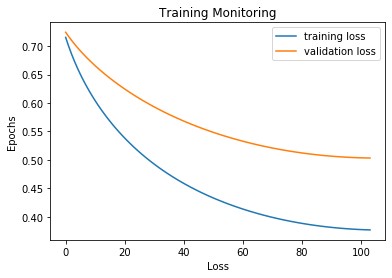

In [1973]:
# fill in your code...
epochs = []
for i in range(len(loss_tr_count)):
    epochs.append(i)
plt.plot(epochs, loss_tr_count, label='training loss')
plt.plot(epochs, dev_loss_count, label='validation loss')
plt.legend()
plt.title('Training Monitoring')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

The model is about right. Because both training loss and validation loss are decling and can be convergence when the training stops.

Compute accuracy, precision, recall and F1-scores:

In [1974]:
preds_te = predict_class(X_te_count, w_count)
print('Accuracy:', accuracy_score(Y_te,preds_te))
print('Precision:', precision_score(Y_te,preds_te,average='macro'))
print('Recall:', recall_score(Y_te,preds_te,average='macro'))
print('F1-Score:', f1_score(Y_te,preds_te,average='macro'))

Accuracy: 0.8277777777777777
Precision: 0.8302519609617837
Recall: 0.8277777777777778
F1-Score: 0.8266459551840306


Print the top-10 words for each class respectively.

In [1975]:
# fill in your code...
list_vocab = list(vocab)
w_class_1 = sorted(w_count[0],reverse = True)
print("top-10 words for class 1:")
for i in range(10):
    index = np.where(w_count[0] == w_class_1[i])[0][0]
    print(list_vocab[index])
print("\n")
w_class_2 = sorted(w_count[1],reverse = True)
print("top-10 words for class 2:")
for i in range(10):
    index = np.where(w_count[1] == w_class_2[i])[0][0]
    print(list_vocab[index])
print("\n")
w_class_3 = sorted(w_count[2],reverse = True)
print("top-10 words for class 3:")
for i in range(10):
    index = np.where(w_count[2] == w_class_3[i])[0][0]
    print(list_vocab[index])

top-10 words for class 1:
said
reuters
tuesday
ap
monday
after
wednesday
new
president
afp


top-10 words for class 2:
athens
ap
olympic
reuters
first
tuesday
after
team
two
wednesday


top-10 words for class 3:
reuters
said
new
tuesday
company
oil
wednesday
prices
inc
after


### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

Explain here...

I attempt to choose learning rate by multiple 0.1. If the loss is increasing, I will adjust the learning rate by choosing a smaller number. If the loss is gradually decreasing and can be convergence, that would be the best choice for learing rate. This is quite similar as hyperparameter choice in binary classfication. After choosing the learning rate, then according to the validation loss increasing or decreasing the regularistion strength 10 times of 0.1. The optimal hyperparameters would give a high precision and recall rate model. The smaller the learning rate, the more training epochs. The regularisation strength can prevent model overfitting, to make sure the model has both good performance on both training set and test set.

### Now evaluate BOW-tfidf...

In [1848]:
w_tfidf, trl, devl = SGD(X_tr_tfidf, Y_tr, 
                     X_dev=X_de_tfidf, 
                     Y_dev=Y_de,
                     num_classes=3,
                     lr=0.0001, 
                     alpha=0.001, 
                     epochs=200)

Epoch:  0 | Training loss:  0.6931591223099036 | Validation loss:  0.7136912272046976
Epoch:  1 | Training loss:  0.6606735990177162 | Validation loss:  0.696990472457131
Epoch:  2 | Training loss:  0.6329067269567162 | Validation loss:  0.6818435154216601
Epoch:  3 | Training loss:  0.6085114958256774 | Validation loss:  0.6679012552799062
Epoch:  4 | Training loss:  0.5866870150652593 | Validation loss:  0.6549525724020693
Epoch:  5 | Training loss:  0.5669235689344793 | Validation loss:  0.6428443096078473
Epoch:  6 | Training loss:  0.5488897471682153 | Validation loss:  0.6314787767470467
Epoch:  7 | Training loss:  0.5323369312443285 | Validation loss:  0.6207695585408777
Epoch:  8 | Training loss:  0.5170598118180788 | Validation loss:  0.6106464212945907
Epoch:  9 | Training loss:  0.5029127725755828 | Validation loss:  0.6010626146011896
Epoch:  10 | Training loss:  0.48977105274379357 | Validation loss:  0.591975432075103
Epoch:  11 | Training loss:  0.4775191482121849 | Vali

Epoch:  94 | Training loss:  0.20446682392608104 | Validation loss:  0.34271978427916816
Epoch:  95 | Training loss:  0.2034311339493938 | Validation loss:  0.3416464516756788
Epoch:  96 | Training loss:  0.202409373480102 | Validation loss:  0.34058663709020515
Epoch:  97 | Training loss:  0.20140200847697612 | Validation loss:  0.3395414282605117
Epoch:  98 | Training loss:  0.20040841196198264 | Validation loss:  0.3385099826537525
Epoch:  99 | Training loss:  0.19942873306723982 | Validation loss:  0.3374925825896531
Epoch:  100 | Training loss:  0.19846260991223297 | Validation loss:  0.33648885912011534
Epoch:  101 | Training loss:  0.1975095254179566 | Validation loss:  0.3354982714465582


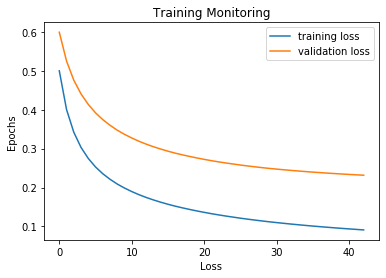

In [1845]:
epochs = []
for i in range(len(trl)):
    epochs.append(i)
plt.plot(epochs, trl, label='training loss')
plt.plot(epochs, devl, label='validation loss')
plt.legend()
plt.title('Training Monitoring')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

In [1846]:
# fill in your code...
preds_te = predict_class(X_te_tfidf, w_tfidf)
print('Accuracy:', accuracy_score(Y_te,preds_te))
print('Precision:', precision_score(Y_te,preds_te,average='macro'))
print('Recall:', recall_score(Y_te,preds_te,average='macro'))
print('F1-Score:', f1_score(Y_te,preds_te,average='macro'))

Accuracy: 0.8711111111111111
Precision: 0.8754389667572947
Recall: 0.8711111111111111
F1-Score: 0.8709990762440044


Print the top-10 words for each class respectively.

In [1847]:
# fill in your code...
w_class_1 = sorted(w_tfidf[0],reverse = True)
print("top-10 words for class 1:")
for i in range(10):
    index = np.where(w_tfidf[0] == w_class_1[i])[0][0]
    print(list_vocab[index])
print("\n")
w_class_2 = sorted(w_tfidf[1],reverse = True)
print("top-10 words for class 2:")
for i in range(10):
    index = np.where(w_tfidf[1] == w_class_2[i])[0][0]
    print(list_vocab[index])
print("\n")
w_class_3 = sorted(w_tfidf[2],reverse = True)
print("top-10 words for class 3:")
for i in range(10):
    index = np.where(w_tfidf[2] == w_class_3[i])[0][0]
    print(list_vocab[index])

top-10 words for class 1:
said
tuesday
afp
greece
monday
ap
('athens', 'greece')
oil
athens
new


top-10 words for class 2:
athens
ap
olympic
team
first
greece
after
olympics
quot
games


top-10 words for class 3:
oil
company
new
prices
said
reuters
more
after
google
inc


## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  |
|:-:|:-:|:-:|:-:|
| BOW-count  | 0.84  | 0.83  | 0.83  |
| BOW-tfidf  | 0.88  | 0.87  | 0.87  |
